In [67]:
import sklearn
import numpy as np 
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings #import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: ylabel='Frequency'>

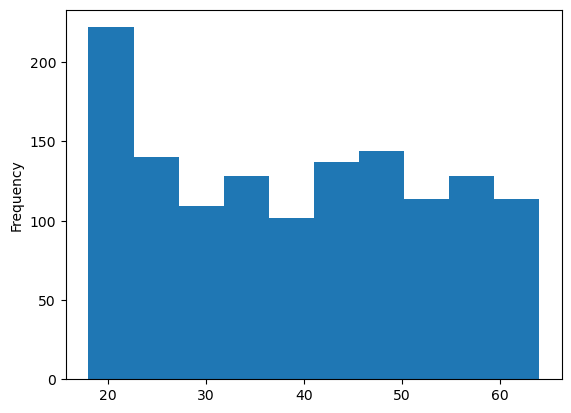

In [8]:
df['age'].plot.hist()

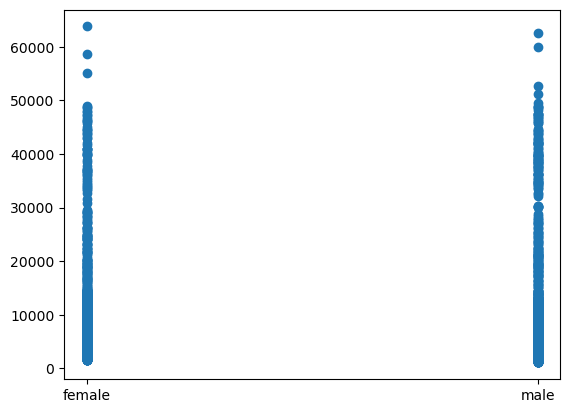

In [13]:
plt.scatter(df['sex'],df['charges'])
plt.show()

<Axes: >

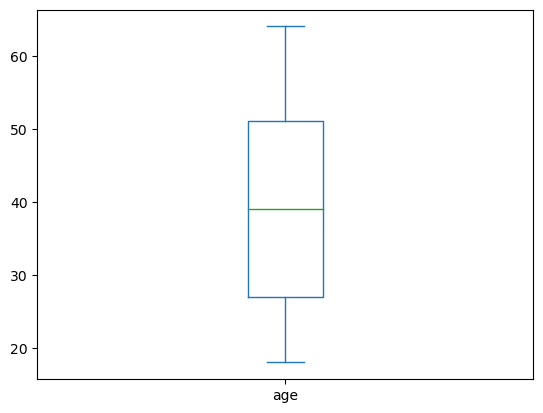

In [14]:
df['age'].plot.box()

<Axes: >

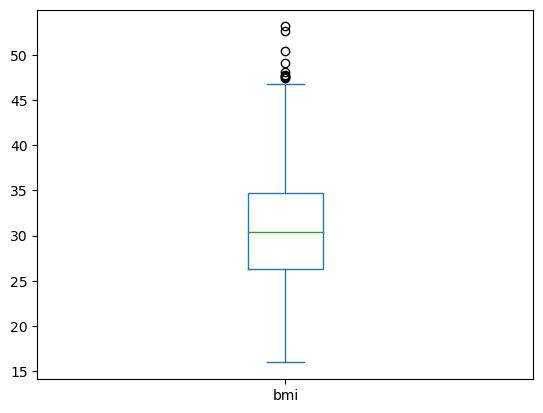

In [15]:
df['bmi'].plot.box()

In [16]:
qnt1=df['bmi'].quantile(0.25)
qnt2=df['bmi'].quantile(0.5)
qnt3=df['bmi'].quantile(0.75)
iqr=qnt3-qnt1
lowlim=qnt1-1.5*iqr
uplim=qnt3+1.5*iqr
print(lowlim)
print(uplim)

13.7
47.290000000000006


In [21]:
df[df['bmi']>uplim]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [22]:
df[df['bmi']>lowlim]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df1=df[df['bmi']<uplim]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

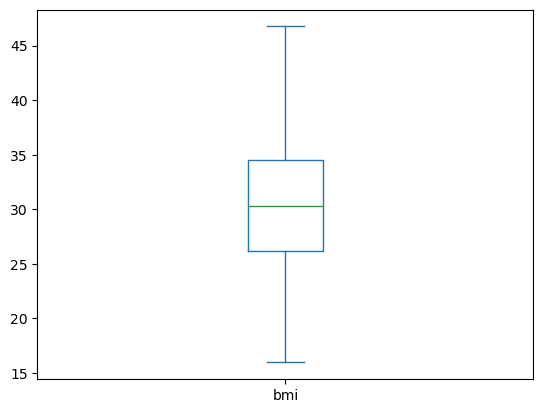

In [26]:
df1['bmi'].plot.box()

In [27]:
df1['bmi'].skew()


0.15717963249230826

In [28]:
df1['age'].skew()

0.058413301736796895

In [31]:
le=LabelEncoder()
df1['sex']=le.fit_transform(df1['sex'])
df1['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1329, dtype: int32

In [32]:
le=LabelEncoder()
df1['smoker']=le.fit_transform(df1['smoker'])
df1['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1329, dtype: int32

In [35]:
le=LabelEncoder()
df1['region']=le.fit_transform(df1['region'])
df1['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1329, dtype: int64

In [34]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


In [39]:
x=df1.iloc[:,0:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [40]:
y=df1.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train.shape

(930, 6)

In [43]:
x_test.shape

(399, 6)

In [44]:
y_train.shape

(930,)

In [45]:
y_test.shape

(399,)

In [46]:
lm=LinearRegression()

In [47]:
lm.fit(x_train,y_train)

LinearRegression()

In [48]:
lm.coef_

array([  252.07523668,   -46.15329433,   327.99882334,   487.61829771,
       23601.57332766,  -539.15063788])

In [49]:
lm.intercept_

-11188.017698610809

In [50]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [51]:
lm.score(x_train,y_train)

0.740458149514302

In [52]:
pred=lm.predict(x_test)
pred

array([  447.15466786, 13269.46956111,  1654.03330947,  7910.62120599,
        4325.2060715 ,  8995.64408108,  5671.86024557,  1960.6502333 ,
       39832.48963082, 13701.86771984, 37711.46815898, 28693.73635769,
        7478.92552476, 32396.9864586 ,  5236.96636959,  8544.51427411,
       10387.12469772,  8486.76860397,  9166.08238567, 28354.10552589,
         243.94912181, 10298.71132063,  6558.70538169,  2715.00665686,
       10067.93695811, 34261.14571402,  9670.79233518,  8024.4733226 ,
        9796.21658688,  6139.11599535,  2732.26232117,  6780.00331907,
        2447.22438564, 10976.38510821,  6807.14321909,  6985.37818122,
        8283.94856663, 30609.96761428,   753.04020461, 36646.47645205,
       30802.76381545,  -719.39970422,  7413.63067132,  5572.24865806,
       10453.13150483,  9678.45843301,  4553.62848392,  4328.80173781,
       13364.05410967,  4542.71498548,  -106.52576187, 34910.1999834 ,
       15266.49853795, 12956.29184889,  4798.28921466, -1317.09181822,
      

In [53]:
print('error')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 3861.7942577658064
Mean squared error: 31215384.670652874
Root Mean Squared Error: 5587.0729967177695


In [55]:
print(r2_score(y_test,pred))

0.7716630723497743


In [56]:
svr=SVR()

In [57]:
svr.fit(x_train,y_train)

SVR()

In [58]:
svr.score(x_train,y_train)

-0.10051438630526421

In [59]:
pred=svr.predict(x_test)
pred

array([9439.76660667, 9629.55435785, 9436.44193345, 9514.20771597,
       9464.81566283, 9592.31504311, 9454.39677175, 9446.12506421,
       9625.91928019, 9636.84959604, 9589.57659606, 9473.27291266,
       9493.66707173, 9504.81214601, 9468.70301712, 9494.35574798,
       9526.22265193, 9547.63946251, 9599.7077337 , 9525.25177488,
       9444.10719267, 9566.65676633, 9536.91666486, 9464.837849  ,
       9476.41033378, 9532.20221912, 9560.90455807, 9514.27025021,
       9631.06569769, 9460.82978464, 9444.0877155 , 9482.87568174,
       9455.18632031, 9617.53886284, 9584.70602725, 9503.17353169,
       9503.42122327, 9508.78481747, 9441.43529275, 9508.21214763,
       9541.86697863, 9441.10868132, 9449.9725355 , 9442.67362206,
       9538.60854262, 9520.99904387, 9477.68577498, 9444.36382254,
       9624.89017973, 9444.36433131, 9442.13025218, 9550.64884259,
       9633.68014699, 9572.74406517, 9441.16704915, 9448.76798825,
       9444.15627298, 9572.74034579, 9516.36099409, 9471.38550

In [60]:
print('error')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 7876.892320398704
Mean squared error: 146302715.3098836
Root Mean Squared Error: 12095.565935907405


In [68]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print('Mean squared error:',np.sqrt(mean_squared_error(y_test,predlasso)))

0.7404581495143011
31215384.562487278
Mean squared error: 5587.072987037782


In [69]:
rd=Ridge(alpha=0.0001)

rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))

predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print("Mean squared error:",np.sqrt(mean_squared_error(y_test,predridge)))

0.7404581495140377
31215384.862796314
Mean squared error: 5587.073013913127


In [64]:
score=cross_val_score(lm,x,y,cv=5) 
print(score)
print(score.mean())
print(score.std())

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497524
0.022777665940616358


In [65]:
score=cross_val_score(svr,x,y,cv=5) 
print(score)
print(score.mean())
print(score.std())

[-0.11490934 -0.11788693 -0.07356416 -0.10055027 -0.11437121]
-0.10425638072707946
0.016476254026325857
